In [283]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

import os
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
root = r"C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\tucan.jpg"

(183, 275)


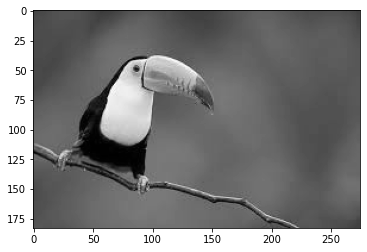

In [284]:
img = cv.imread(os.path.join(root,))
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
print(img.shape)

In [285]:
# Cambiamos el tamaño a un array de Mx1 (con M el número de píxels). Es decir, un vector de M componentes por canal gris
features = img.reshape((-1,))
print('Dimensión de la matriz de características (espacio de grises): {}'.format(features.shape))
features = np.float32(features)

Dimensión de la matriz de características (espacio de grises): (50325,)


In [286]:
(y,x)=img.shape
X=np.repeat(np.array(range(0,x)),y)
Y=np.repeat(np.array(range(0,y)),x).reshape((-1,))

X.shape, Y.shape, features.shape

((50325,), (50325,), (50325,))

In [287]:
featuresDim = np.array([features,Y, X], dtype = 'float32').T
featuresDim.shape

(50325, 3)

1. Construir un espacio de características basado en color

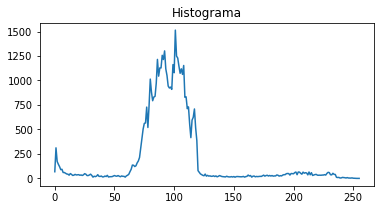

In [288]:
# Histograma
hist2,bins2 = np.histogram(img.ravel(),256,[0,256])
fig, ax4 = plt.subplots(1,1,figsize=(6,3))
ax4.plot(hist2)
ax4.set_title('Histograma')
plt.show()

2. Construir un espacio de características basado en color y posición.

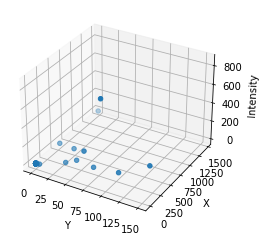

In [289]:
# Feath espacial
featuresDim_hist, bins = np.histogramdd(featuresDim) 
featuresDim_hist.shape
ax = plt.axes(projection='3d')
ax.scatter3D(featuresDim_hist[1],featuresDim_hist[2],featuresDim_hist[0])
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Intensity');


3. Obtener la imagen posterizada y las mascaras correspondientes a cada
clase, utilizando k-means con asignación aleatoria de centroides
    * espacio de color

In [290]:


# Definimos el criterio de detención (Epsilon e iteraciones máximas) y número de clústers (K)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1.0)
K = 3

# Corremos el algoritmo de K-means con:
# - El criterio de detención predefinido
# - 10 ejecuciones del algoritmo distintos parametros iniciales (devuelve los centros de la corrida que de grupos más compactos)
# - Parámetro de incialización de las semillas (aleatorio)
compact, label, color_clusters = cv.kmeans(features, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)


In [291]:
# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n')

Centroides: 
 [[200]
 [ 95]
 [ 17]] 



(183, 275)


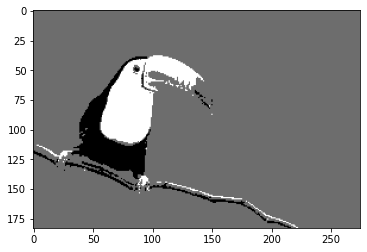

In [292]:
# Cada píxel que corresponde a un grupo tiene copiado como etiqueta el color al que corresponde. Hacemos un reshape al tamaño original de la matriz de imagen 
img_out = color_clusters[label.flatten()]
img_out = img_out.reshape((img.shape))

# Mostramos la imagen compuesta
plt.imshow(img_out, cmap='gray')
print(img.shape)



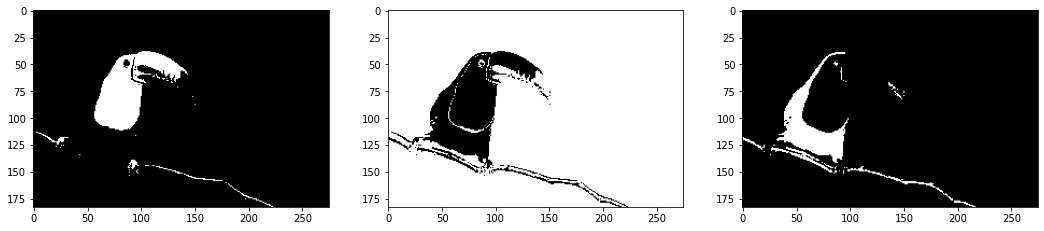

In [293]:


# Mostramos las máscaras de segmentación
mask_list = list()
for cluster in color_clusters:
    mask = np.zeros(img_out.shape,'uint8')
    mask[np.where(img_out == cluster)] = 255
    mask_list.append(mask)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(mask_list[0], cmap='gray')
axs[1].imshow(mask_list[1], cmap='gray')
axs[2].imshow(mask_list[2], cmap='gray')



3. Obtener la imagen posterizada y las mascaras correspondientes a cada
clase, utilizando k-means con asignación aleatoria de centroides
    * color y dimenciones espaciales

In [294]:
# Normalizamos
featuresDim[:,0] = np.divide((featuresDim[:,0]- np.mean(featuresDim[:,0])) , np.std(featuresDim[:,0]))
featuresDim[:,1] = np.divide((featuresDim[:,1] - np.mean(featuresDim[:,1])) , np.std(featuresDim[:,1]))
featuresDim[:,2] = np.divide((featuresDim[:,2] - np.mean(featuresDim[:,2])) , np.std(featuresDim[:,2]))

# Definimos el criterio de detención (Epsilon e iteraciones máximas) y número de clústers (K)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1)
K = 3

# Corremos el algoritmo de K-means con:
# - El criterio de detención predefinido
# - 10 ejecuciones del algoritmo distintos parametros iniciales (devuelve los centros de la corrida que de grupos más compactos)
# - Parámetro de incialización de las semillas (aleatorio)
compact2, label2, color_clusters2 = cv.kmeans(np.float32(featuresDim), K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [295]:
# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters2 = np.uint8(color_clusters2[:,0] * 255)
print(f'Centroides: \n {color_clusters2} \n')
label2.shape

Centroides: 
 [255 182 229] 



(50325, 1)

(183, 275)


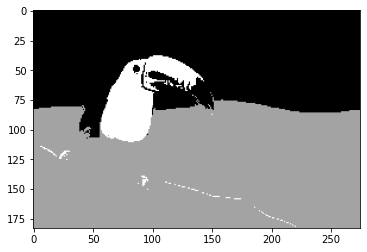

In [296]:
# Cada píxel que corresponde a un grupo tiene copiado como etiqueta el color al que corresponde. Hacemos un reshape al tamaño original de la matriz de imagen 
img_out2 = color_clusters2[label2.flatten()]
img_out2 = img_out2.reshape((img.shape))

# Mostramos la imagen compuesta
plt.imshow(img_out2, cmap='gray')
print(img.shape)



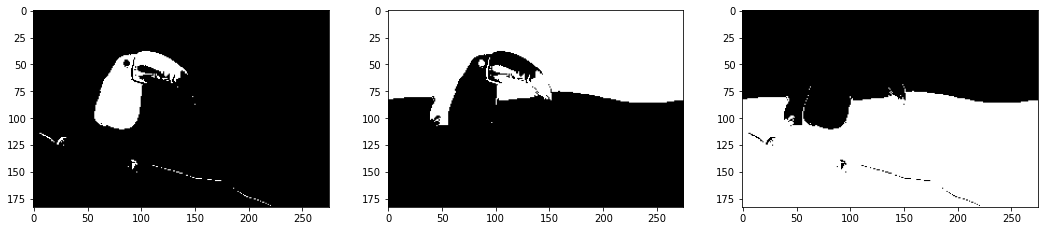

In [297]:
# Mostramos las máscaras de segmentación
mask_list = list()
for cluster in color_clusters2:
    mask = np.zeros(img_out2.shape,'uint8')
    mask[np.where(img_out2 == cluster)] = 255
    mask_list.append(mask)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(mask_list[0], cmap='gray')
axs[1].imshow(mask_list[1], cmap='gray')
axs[2].imshow(mask_list[2], cmap='gray')

